<a href="https://www.kaggle.com/code/brunokobi/rededogs?scriptVersionId=134183226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import os
import math
import shutil
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Importando as bibliotecas necessárias

# Importando TensorFlow para computação numérica e treinamento de redes neurais
import tensorflow as tf

# Importando Pandas para manipulação de dados
import pandas as pd

# Importando NumPy para cálculos numéricos
import numpy as np

# Importando ResNet50 e preprocess_input para usar a arquitetura ResNet50 pré-treinada
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input

# Importando Sequential, load_model, Dense, Dropout, Flatten e ModelCheckpoint do Keras para construção e treinamento de redes neurais
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

# Importando Matplotlib para visualização de gráficos
import matplotlib.pyplot as plt

# Importando PIL para processamento de imagens
from PIL import Image

# Importando módulos para operações de sistema de arquivos, cálculos matemáticos e manipulação de arquivos
import os
import math
import shutil

# Importando classes para pré-processamento de dados e avaliação de modelos de aprendizado de máquina
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Fim da importação das bibliotecas necessárias


In [7]:
# Carregando os rótulos das raças dos cães a partir de um arquivo CSV usando o Pandas
y_df = pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')

# Convertendo os rótulos das raças em uma matriz NumPy e redimensionando para ter uma única coluna
y_breed = np.asarray(y_df['breed']).reshape(-1, 1)

# Criando uma instância do codificador OneHotEncoder e aplicando-o aos rótulos das raças
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(y_breed)

# Mapeando os rótulos das raças para os índices correspondentes no vetor codificado one-hot
labels_mapping = {np.argmax(y[i]): y_df.loc[i, 'breed'] for i in range(len(y))}

# Definindo a altura e a largura desejadas para as imagens
image_height = 50
image_width = 50

# Carregando as imagens dos cães e redimensionando-as para a altura e a largura especificadas
x = []
for i in y_df['id']:
  image = Image.open('/kaggle/input/dog-breed-identification/train/' + i + '.jpg')
  x.append(np.array(image.resize((image_height, image_width))))
x = np.asarray(x)

In [8]:
# Dividindo os dados em conjuntos de treinamento e teste usando a função train_test_split do scikit-learn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True, stratify=y)
    

In [10]:
# Cria uma instância do modelo ResNet50 pré-treinado com os pesos da ImageNet
RN50 = ResNet50(include_top=False, weights='imagenet', input_shape=(image_height, image_width, 3))

# Obtém os recursos extraídos das imagens de treinamento usando o modelo ResNet50
x_train_features = RN50.predict(preprocess_input(x_train))

# Obtém os recursos extraídos das imagens de teste usando o modelo ResNet50
x_test_features = RN50.predict(preprocess_input(x_test))


64/64 [==============================] - 1s 18ms/step


In [11]:
# Cria um modelo sequencial para classificação de raças de cães
model = Sequential()

# Adiciona uma camada de achatamento (flatten) para converter os recursos extraídos em um vetor unidimensional
model.add(Flatten(input_shape=x_train_features.shape[1:]))

# Aplica regularização Dropout para evitar overfitting, descartando aleatoriamente 50% dos neurônios
model.add(Dropout(0.5))

# Adiciona uma camada densamente conectada com 240 unidades e função de ativação ReLU
model.add(Dense(units=240, activation='relu'))

# Aplica regularização Dropout, descartando aleatoriamente 30% dos neurônios
model.add(Dropout(0.3))

# Adiciona a camada de saída com 120 unidades (correspondendo às 120 raças de cães) e função de ativação softmax
model.add(Dense(units=120, activation='softmax'))

# Imprime um resumo do modelo, mostrando a arquitetura, número de parâmetros e tamanhos das camadas
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 240)               1966320   
                                                                 
 dropout_1 (Dropout)         (None, 240)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               28920     
                                                                 
Total params: 1,995,240
Trainable params: 1,995,240
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/20
29/32 [==========================>...] - ETA: 0s - loss: 6.3277 - accuracy: 0.0113
Epoch 1: val_accuracy improved from -inf to 0.00929, saving model to best_model.h5
32/32 [==============================] - 3s 21ms/step - loss: 6.2080 - accuracy: 0.0115 - val_loss: 4.7917 - val_accuracy: 0.0093
Epoch 2/20
30/32 [===========================>..] - ETA: 0s - loss: 4.9048 - accuracy: 0.0094
Epoch 2: val_accuracy improved from 0.00929 to 0.01174, saving model to best_model.h5
32/32 [==============================] - 0s 12ms/step - loss: 4.9039 - accuracy: 0.0092 - val_loss: 4.7877 - val_accuracy: 0.0117
Epoch 3/20
29/32 [==========================>...] - ETA: 0s - loss: 4.8327 - accuracy: 0.0145
Epoch 3: val_accuracy improved from 0.01174 to 0.01418, saving model to best_model.h5
32/32 [==============================] - 0s 11ms/step - loss: 4.8336 - accuracy: 0.0144 - val_loss: 4.7778 - val_accuracy: 0.0142
Epoch 4/20
30/32 [===========================>..] - ETA: 0s - loss: 4.801

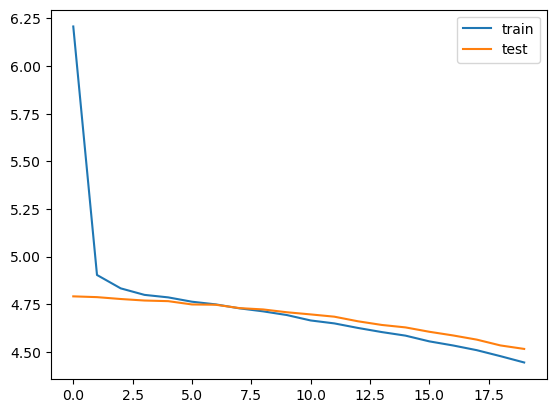

In [12]:
# Compila o modelo, especificando o otimizador, a função de perda e as métricas a serem usadas
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Define um callback para salvar o melhor modelo com base na precisão de validação
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Define o tamanho do lote e o número de épocas de treinamento
batch_size = 256
nb_epochs = 20

# Treina o modelo usando os recursos extraídos das imagens de treinamento
# e as classes de treinamento, com validação usando os recursos extraídos das imagens de teste e as classes de teste
history = model.fit(x_train_features, y_train, batch_size=batch_size, epochs=nb_epochs,
                    validation_data=[x_test_features, y_test], callbacks=[mc])

# Carrega o melhor modelo salvo durante o treinamento
saved_model = load_model('best_model.h5')

# Plota as curvas de perda (loss) do treinamento e da validação ao longo das épocas
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [13]:
# Faz a previsão das classes das imagens de teste usando o modelo salvo
y_test_pred = saved_model.predict(x_test_features)

# Obtém o índice da classe com maior probabilidade de cada previsão
y_test_pred_id = np.argmax(y_test_pred, axis=1).reshape(-1, 1)

# Obtém o índice da classe real de cada imagem de teste
y_test_id = np.argmax(y_test, axis=1).reshape(-1, 1)

# Cria um DataFrame de matriz de confusão usando as previsões e as classes reais
df_cm = pd.DataFrame(confusion_matrix(y_test_id, y_test_pred_id),
                     index=[labels_mapping[i] for i in range(len(labels_mapping))],
                     columns=[labels_mapping[i] for i in range(len(labels_mapping))])

# Calcula as classes mais confusas, ou seja, as classes que têm maior confusão com outras classes
most_confused = []
for i in range(len(labels_mapping)):
    most_confused.append((df_cm.index[i], df_cm.iloc[i, df_cm.columns != df_cm.index[i]].idxmax(),
                          df_cm.iloc[i, df_cm.columns != df_cm.index[i]].max(axis=0),
                          df_cm.iloc[i].sum(axis=0)))
most_confused.sort(key=lambda x: x[2], reverse=True)

# Imprime as classes mais confusas
print(most_confused)


64/64 [==============================] - 0s 3ms/step
[('leonberg', 'scottish_deerhound', 11, 21), ('afghan_hound', 'scottish_deerhound', 9, 23), ('airedale', 'scottish_deerhound', 9, 22), ('border_terrier', 'scottish_deerhound', 9, 18), ('kuvasz', 'maltese_dog', 8, 14), ('great_pyrenees', 'samoyed', 7, 22), ('miniature_schnauzer', 'scottish_deerhound', 7, 16), ('silky_terrier', 'scottish_deerhound', 7, 18), ('tibetan_terrier', 'scottish_deerhound', 7, 22), ('welsh_springer_spaniel', 'blenheim_spaniel', 7, 16), ('basenji', 'scottish_deerhound', 6, 22), ('bluetick', 'scottish_deerhound', 6, 17), ('chesapeake_bay_retriever', 'scottish_deerhound', 6, 17), ('dandie_dinmont', 'maltese_dog', 6, 18), ('irish_wolfhound', 'scottish_deerhound', 6, 20), ('lakeland_terrier', 'scottish_deerhound', 6, 20), ('miniature_poodle', 'maltese_dog', 6, 16), ('norfolk_terrier', 'scottish_deerhound', 6, 17), ('old_english_sheepdog', 'maltese_dog', 6, 17), ('pembroke', 'scottish_deerhound', 6, 18), ('pug', 'sco

In [14]:
# Inicializa listas para armazenar os dados de teste e as imagens de submissão
test = []
submission_images = []

# Itera sobre os arquivos no diretório de teste
for filename in os.listdir('/kaggle/input/dog-breed-identification/test/'):
    # Abre a imagem e a adiciona à lista de imagens de submissão
    image = Image.open('/kaggle/input/dog-breed-identification/test/' + str(filename))
    submission_images.append(filename.split('.')[0])
    
    # Redimensiona a imagem e a adiciona à lista de dados de teste
    test.append(np.array(image.resize((image_height, image_width))))
test = np.asarray(test)

# Imprime a forma dos dados de teste
print(test.shape)

# Obtém os recursos extraídos das imagens de teste usando o modelo ResNet50
test_features = RN50.predict(preprocess_input(test))

# Faz a previsão das probabilidades das classes para as imagens de teste usando o modelo salvo
submission_ohe = saved_model.predict(test_features)

# Cria um DataFrame para a submissão, com as probabilidades das classes e os IDs das imagens
submission = pd.DataFrame(submission_ohe, columns=[labels_mapping[i] for i in range(len(labels_mapping))])
submission.insert(0, 'id', submission_images)

# Salva o DataFrame como um arquivo CSV para submissão
submission.to_csv('/kaggle/working/submission.csv', index=False)


(10357, 50, 50, 3)
324/324 [==============================] - 1s 2ms/step
